<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r4-less-features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-15-m-1-r4.csv?token=AKVFSOE5TRYEHQB5LGEPJO263INLO')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-15-m-11-r4.csv?token=AKVFSOGGFTANMBL73NT4MQS63INLS')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-4-m-1-r4.csv?token=AKVFSOBYXFJC236HHYDQJQS63INLU')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-4-m-11-r4.csv?token=AKVFSOEPPYWLZHJ236KIQR263INLY')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-6-m-1-r4.csv?token=AKVFSOFQQNWGS4UE7KYMFB263INL6')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-6-m-11-r4.csv?token=AKVFSOGXODHSTMM4EGKQHAS63INME')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-9-m-1-r4.csv?token=AKVFSOCARPYMVPVWWPP2UN263INMI')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-9-m-11-r4.csv?token=AKVFSOFLDZUEOQCG5HVOKF263INMQ')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-normal-n-0-15-r4.csv?token=AKVFSOCRF7VQ65UPET5B2NS63INMS')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-normal-n-0-4-r4.csv?token=AKVFSOBUFF57HNEVIT2QJJS63INMW')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-normal-n-0-6-r4.csv?token=AKVFSOHO6HNPKNOVPWLVOJ263INM4')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-normal-n-0-9-r4.csv?token=AKVFSODWMDN2YLTP52YICSC63INNA')

In [4]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(101735, 26)
(100063, 26)
(151694, 26)
(149982, 26)
(105348, 26)
(103725, 26)
(101922, 26)
(100166, 26)
(74341, 26)
(124078, 26)
(78023, 26)
(74548, 26)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r4-train.csv',index=False)

In [6]:
df = pd.read_csv('fft-r4-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,4,4,23,7,2,3,0,0.0,4,129,1,129,129,0,8,3,27,0
1,7,2,0,1,1,4,3,9,4,4,23,7,2,3,0,0.0,4,115,1,115,115,0,8,3,27,1
2,7,2,0,1,1,4,3,9,4,4,23,7,3,3,0,0.0,4,129,1,129,129,0,12,3,27,0
3,70,0,2,4,1,1,5,17,23,7,4,4,2,3,3,1.0,16,114,2,115,228,0,8,20,340,1
4,71,0,2,4,2,2,5,17,23,7,4,4,2,3,3,1.0,17,113,3,115,339,0,32,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265620,3276593,2,0,4,2,2,5,19,20,4,15,15,30092,5,0,0.0,5,5,20,24,100,0,481472,20,380,0
1265621,3276594,2,0,4,3,2,5,19,20,4,15,15,30092,5,0,0.0,6,4,21,24,84,0,722208,20,380,0
1265622,3276595,2,0,4,4,2,5,19,20,4,15,15,30092,5,0,0.0,7,3,22,24,66,0,962944,20,380,0
1265623,3276596,2,0,3,1,4,3,10,20,4,18,2,30092,3,0,0.0,8,2,23,24,46,0,361104,9,90,0


In [7]:
df.shape

(1265625, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-15-m-12-r4.csv?token=AKVFSOELY7EYPZC6QZRXOJ263INYG')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-15-m-7-r4.csv?token=AKVFSOA7ZSSOS55SHOQWE4K63INYK')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-4-m-12-r4.csv?token=AKVFSOGVLE5EA2HDMHFN7XC63INYM')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-4-m-7-r4.csv?token=AKVFSOFOCZL7VGDJJYMNNUC63INYS')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-6-m-12-r4.csv?token=AKVFSOB6MDUT2HAKK25WTMS63INYY')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-6-m-7-r4.csv?token=AKVFSOEZEIMBRFUGIJ4SABC63INZA')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-9-m-12-r4.csv?token=AKVFSOG44CWSJ3ONBI4WYLC63INZC')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-9-m-7-r4.csv?token=AKVFSOANMCRIGIKFQXOH3IC63INZG')

In [9]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(108174, 26)
(103449, 26)
(158087, 26)
(153540, 26)
(111614, 26)
(107195, 26)
(108282, 26)
(103725, 26)


In [10]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,85,1,2,1,1,4,3,9,6,6,24,8,4,3,2,0.666667,13,80,1,80,80,2,16,3,27,0
1,106,3,2,4,1,1,5,17,23,7,0,0,1,4,3,0.750000,16,79,2,80,158,6,4,20,340,0
2,107,3,2,4,2,2,5,17,23,7,0,0,1,4,3,0.750000,17,78,3,80,234,6,16,20,340,0
3,108,3,2,4,3,2,5,17,23,7,0,0,1,4,3,0.750000,18,77,4,80,308,6,24,20,340,0
4,109,3,2,4,4,2,5,17,23,7,0,0,1,4,3,0.750000,19,76,5,80,380,6,32,20,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105343,3266159,3,2,7,1,4,3,9,22,6,0,0,30087,3,2,0.666667,13,5,7,11,35,6,842436,21,189,0
105344,3266203,3,2,4,1,1,5,17,23,7,0,0,30088,4,3,0.750000,17,4,8,11,32,6,120352,20,340,0
105345,3266204,3,2,4,2,2,5,17,23,7,0,0,30088,4,3,0.750000,18,3,9,11,27,6,481408,20,340,0
105346,3266205,3,2,4,3,2,5,17,23,7,0,0,30088,4,3,0.750000,19,2,10,11,20,6,722112,20,340,0


Processing

In [11]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [13]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.640860,-0.231043,0.017385,-0.027084,0.533824,0.547234,0.011146,0.164037,-0.257597,-0.557620,-0.456159,-0.064275,-0.016396,-0.061405,-0.061887,0.529113,-0.067549,0.257988,0.499396,0.040587
inport,-0.640860,1.000000,0.289527,-0.001553,0.002418,-0.475627,-0.566596,0.016753,0.084813,0.610024,0.855844,0.611373,0.004628,-0.075568,-0.053998,-0.046284,0.139108,0.092865,-0.156273,-0.468238,-0.012670
cache_coherence_type,-0.231043,0.289527,1.000000,0.197501,-0.307641,-0.342114,-0.390422,0.024052,0.035486,0.196786,0.271243,0.035501,0.021758,-0.037889,-0.012279,-0.009107,-0.055188,0.275194,0.583931,-0.041410,-0.003908
flit_id,0.017385,-0.001553,0.197501,1.000000,0.044792,0.208797,0.177944,0.002038,-0.021720,-0.003028,-0.004105,0.295005,-0.026947,0.019934,-0.005338,-0.004624,0.023541,0.629836,0.354087,0.280004,0.001325
flit_type,-0.027084,0.002418,-0.307641,0.044792,1.000000,-0.325241,-0.277182,-0.003179,0.033830,0.004715,0.006394,0.351879,-0.019953,0.031562,0.008837,0.007935,-0.036675,0.176635,-0.551556,-0.436158,-0.002062
vnet,0.533824,-0.475627,-0.342114,0.208797,-0.325241,1.000000,0.971917,-0.023400,-0.024022,-0.142791,-0.302120,-0.492077,-0.057010,0.015727,-0.031423,-0.032728,0.277886,-0.065005,0.563047,0.942206,0.027511
vc,0.547234,-0.566596,-0.390422,0.177944,-0.277182,0.971917,1.000000,-0.030076,-0.068686,-0.256525,-0.424187,-0.529882,-0.053351,0.028644,-0.018806,-0.020271,0.183640,-0.085755,0.496298,0.930618,0.020078
traversal_id,0.011146,0.016753,0.024052,0.002038,-0.003179,-0.023400,-0.030076,1.000000,0.027081,0.016697,0.017643,0.026611,0.095050,0.096047,0.145459,0.090783,0.051697,0.560801,0.000937,-0.021631,-0.258324
hop_count,0.164037,0.084813,0.035486,-0.021720,0.033830,-0.024022,-0.068686,0.027081,1.000000,0.613104,0.226307,0.300051,-0.027362,-0.039931,-0.051221,-0.052578,0.365381,0.012666,0.010457,-0.046012,-0.023544
current_hop,-0.257597,0.610024,0.196786,-0.003028,0.004715,-0.142791,-0.256525,0.016697,0.613104,1.000000,0.818575,0.591655,-0.000345,-0.064427,-0.049303,-0.049732,0.348125,0.050997,0.049710,-0.160386,0.007665


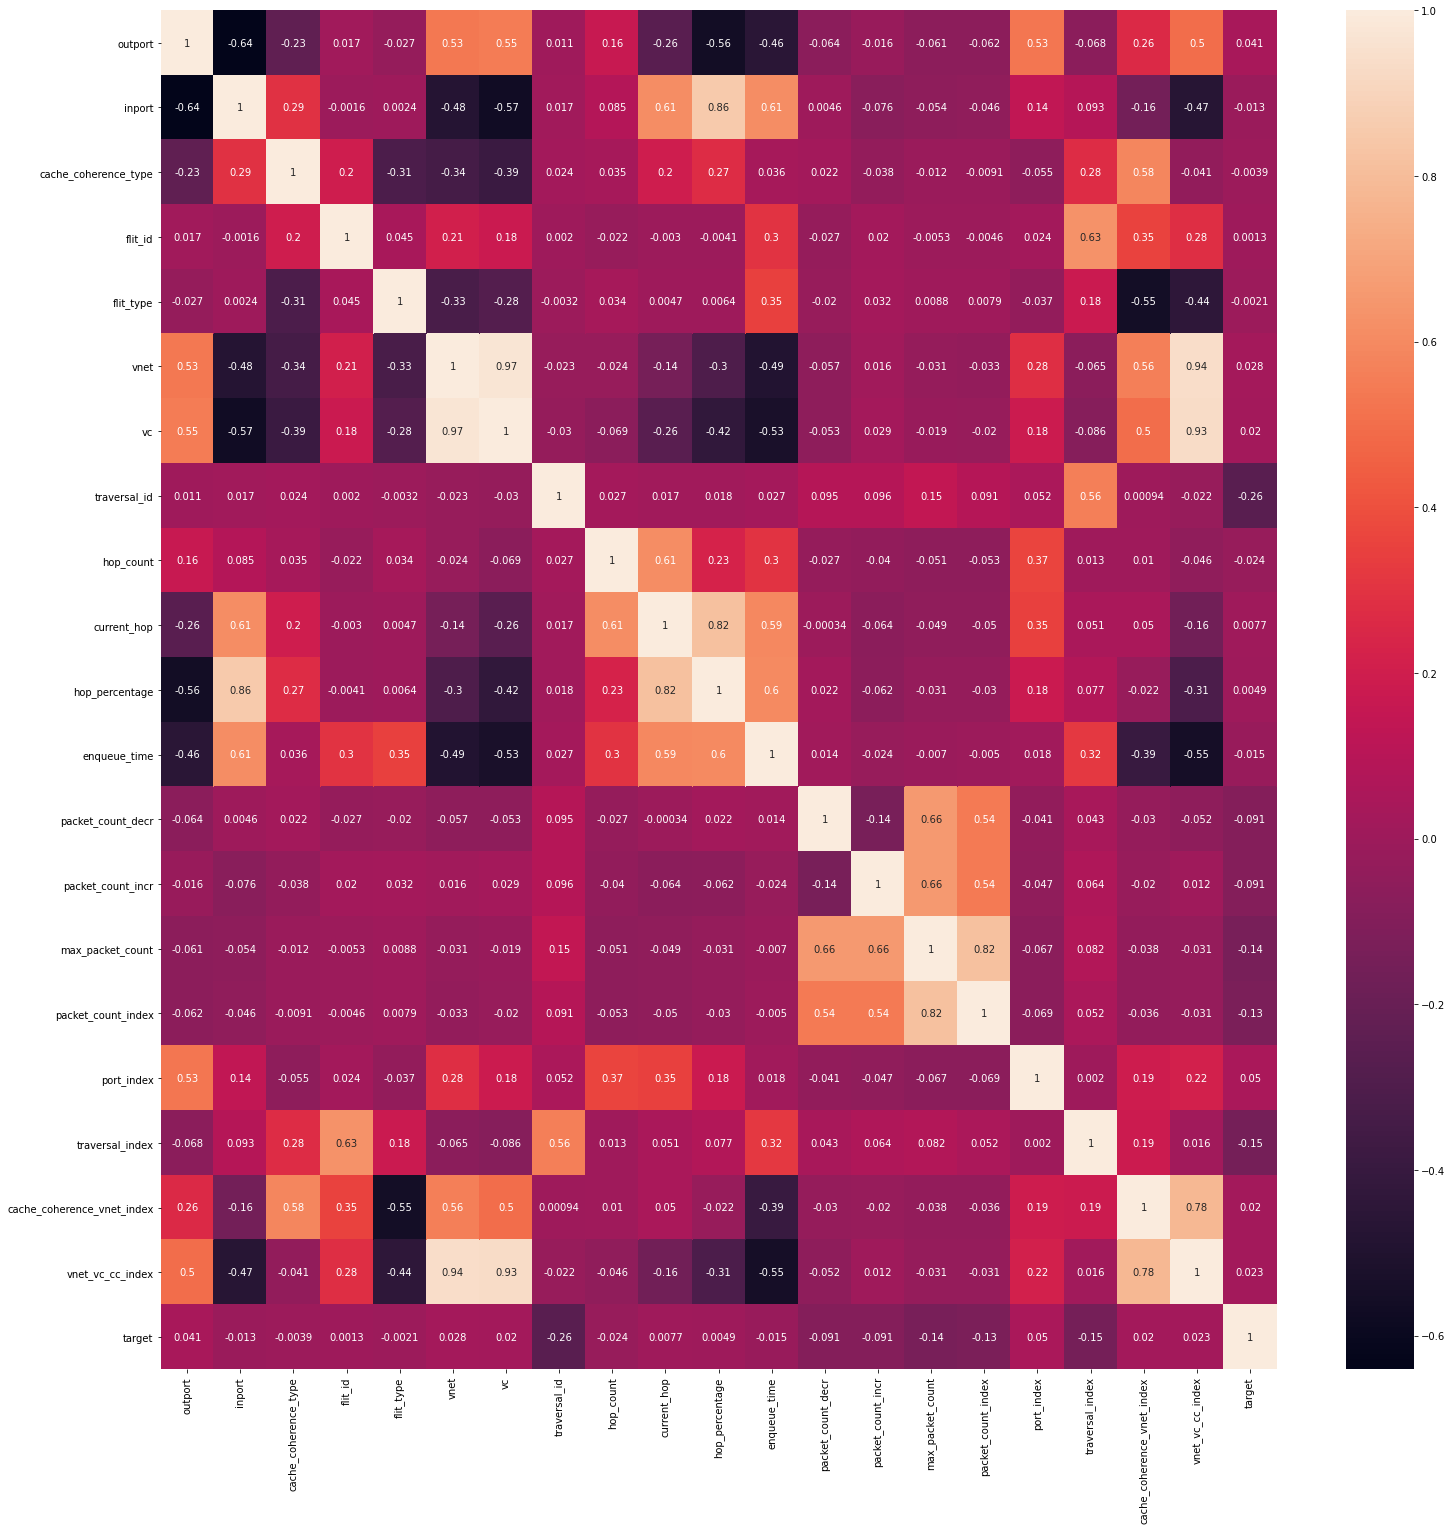

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [16]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

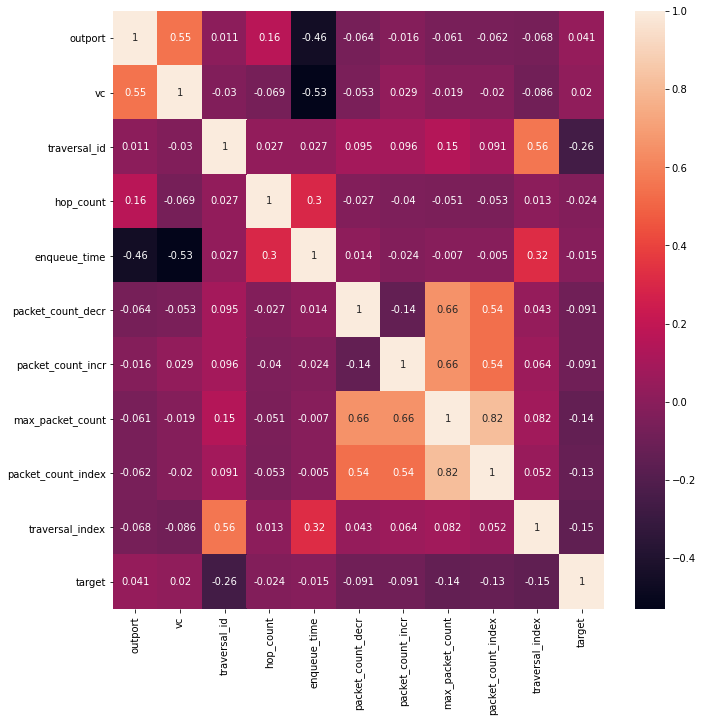

In [18]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

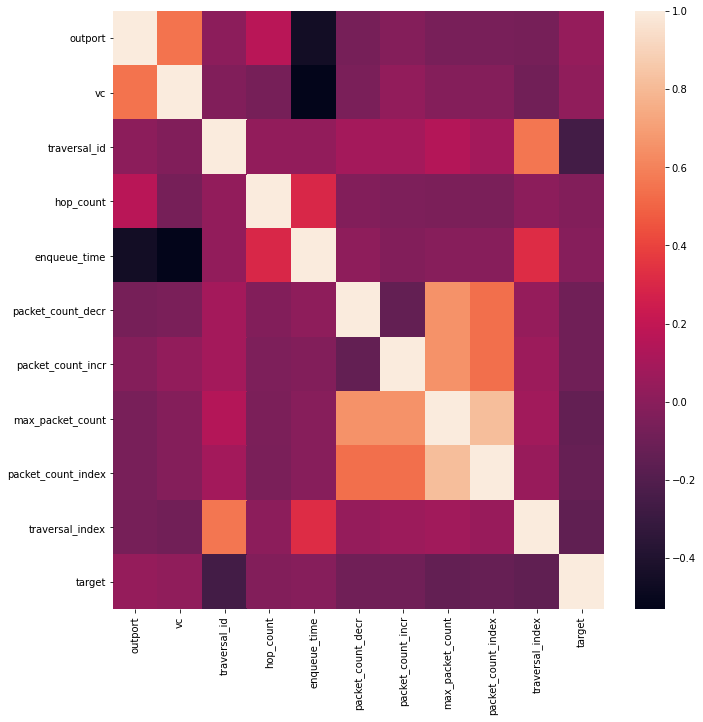

In [19]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [21]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.666667,0.000000,0.000033,0.500000,0.000000,0.524590,0.000000,0.524590,0.008461,0.000001
1,0.666667,0.000000,0.000033,0.500000,0.000000,0.467213,0.000000,0.467213,0.007536,0.000001
2,0.666667,0.000000,0.000066,0.500000,0.000000,0.524590,0.000000,0.524590,0.008461,0.000003
3,0.000000,0.727273,0.000033,0.500000,0.166667,0.463115,0.004098,0.467213,0.015005,0.000001
4,0.000000,0.727273,0.000033,0.500000,0.180556,0.459016,0.008197,0.467213,0.022343,0.000010
...,...,...,...,...,...,...,...,...,...,...
1265620,0.666667,0.909091,0.999967,0.833333,0.013889,0.016393,0.077869,0.094262,0.006544,0.177782
1265621,0.666667,0.909091,0.999967,0.833333,0.027778,0.012295,0.081967,0.094262,0.005487,0.266674
1265622,0.666667,0.909091,0.999967,0.833333,0.041667,0.008197,0.086066,0.094262,0.004297,0.355566
1265623,0.666667,0.090909,0.999967,0.500000,0.055556,0.004098,0.090164,0.094262,0.002975,0.133336


In [22]:
train_X[train_X.duplicated()].shape

(6435, 10)

In [23]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.000000,0.727273,0.0,0.6,0.166667,0.472222,0.000000,0.472222,0.008586,0.000000
1,1.000000,0.727273,0.0,0.6,0.180556,0.467593,0.004630,0.472222,0.017088,0.000004
2,1.000000,0.727273,0.0,0.6,0.194444,0.462963,0.009259,0.472222,0.025421,0.000007
3,1.000000,0.727273,0.0,0.6,0.208333,0.458333,0.013889,0.472222,0.033586,0.000010
4,1.000000,0.727273,0.0,0.6,0.263889,0.453704,0.018519,0.472222,0.041582,0.000021
...,...,...,...,...,...,...,...,...,...,...
108169,0.666667,0.909091,1.0,0.8,0.013889,0.018519,0.087963,0.106481,0.008333,0.044445
108170,0.666667,0.909091,1.0,0.8,0.027778,0.013889,0.092593,0.106481,0.006987,0.177782
108171,0.666667,0.909091,1.0,0.8,0.041667,0.009259,0.097222,0.106481,0.005471,0.266674
108172,0.666667,0.909091,1.0,0.8,0.055556,0.004630,0.101852,0.106481,0.003788,0.355566


In [24]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [25]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [26]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [27]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


In [28]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 10)


In [29]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 10)


In [30]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [32]:
train_Y = df['target']
train_Y.value_counts()

0    914635
1    350990
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                Specs         Score
2        traversal_id  11485.136698
9     traversal_index   3862.790887
7    max_packet_count   2053.291193
8  packet_count_index   2040.067381
5   packet_count_decr   1030.878483
6   packet_count_incr   1022.422659
0             outport    607.507222
1                  vc    159.351591
3           hop_count     65.030241
4        enqueue_time     31.244646


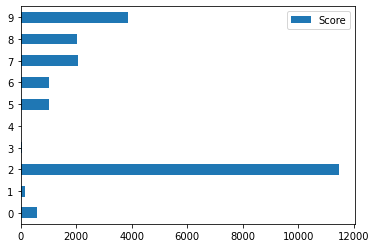

In [35]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r4.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [40]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 94.2792098765432
Test Prediction Score 93.6161975308642


In [41]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 85.9938617412687
Test Prediction Score 87.21302284217344
Test Prediction Score 89.46972236806316
Test Prediction Score 88.70978246710955
Test Prediction Score 85.47852419947318
Test Prediction Score 87.4359811558375
Test Prediction Score 86.03923089710202
Test Prediction Score 86.6117136659436


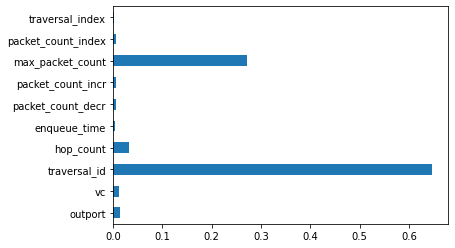

In [42]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

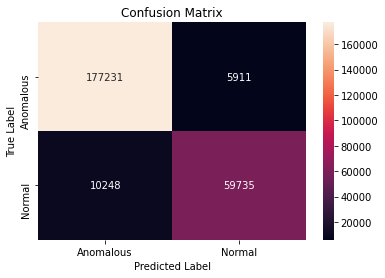

In [43]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [44]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    183142
           1       0.91      0.85      0.88     69983

    accuracy                           0.94    253125
   macro avg       0.93      0.91      0.92    253125
weighted avg       0.94      0.94      0.94    253125



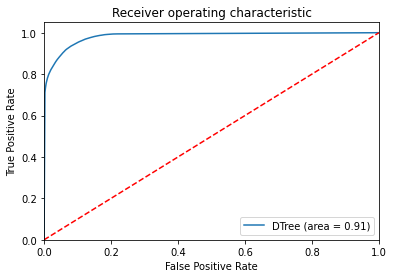

In [45]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [47]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r4l.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [50]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.97837037037037
Test Prediction Score 99.567012345679


In [51]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 88.00913343317248
Test Prediction Score 88.63884619474331
Test Prediction Score 89.84293458665165
Test Prediction Score 89.98502019017846
Test Prediction Score 87.56697188524737
Test Prediction Score 88.87448108587154
Test Prediction Score 87.71818030697622
Test Prediction Score 88.68353820197638


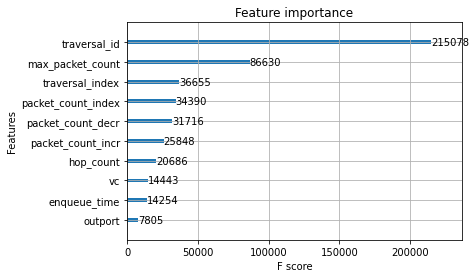

In [52]:
plot_importance(xgbc)
plt.show()

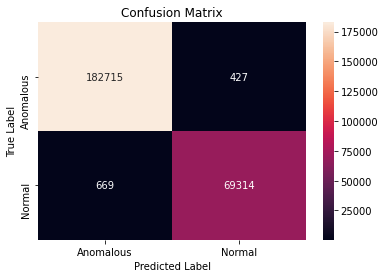

In [53]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [54]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    183142
           1       0.99      0.99      0.99     69983

    accuracy                           1.00    253125
   macro avg       1.00      0.99      0.99    253125
weighted avg       1.00      1.00      1.00    253125



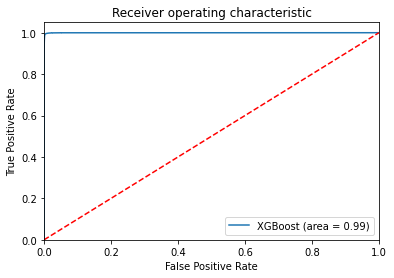

In [55]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()